In [4]:
import pandas as pd
import glob
import os
import numpy as np


# Step 1: Read all Oncomatrix_*.tsv files
path = r"C:\Users\shrav\Desktop\PYTHON\MUTATED GENES\PRIMARY SITES"  # Set this to your folder path if files aren't in the notebook's folder
files = glob.glob(os.path.join(path, "Oncomatrix_*.tsv"))

# Step 2: Prepare lists for detailed and binary matrices
binary_data = []
detailed_data = []

# Step 3: Loop through each file and process
for file in files:
    # Extract primary site name from filename
    site_name = os.path.basename(file).replace("Oncomatrix_", "").replace(".tsv", "")
    
    # Read the TSV file
    df = pd.read_csv(file, sep='\t', index_col=0)
    
    # Add Primary Site info
    df["Primary_Site"] = site_name
    
    # Store detailed version
    detailed_data.append(df.copy())
    
    # Create binary version (1 = mutation present, 0 = none)
    binary_df = df.drop(columns=["Primary_Site"]).notna().astype(int)
    binary_df["Primary_Site"] = site_name
    binary_data.append(binary_df)

# Step 4: Combine all data into a single DataFrame
combined_detailed = pd.concat(detailed_data)
combined_binary = pd.concat(binary_data)

# Step 5: Save the combined files
combined_detailed.to_csv("Combined_Oncomatrix_Detailed_with Site.csv")
combined_binary.to_csv("Combined_Oncomatrix_Binary_with Site.csv")

print("✅ Combined matrices saved with primary site labels!")


✅ Combined matrices saved with primary site labels!


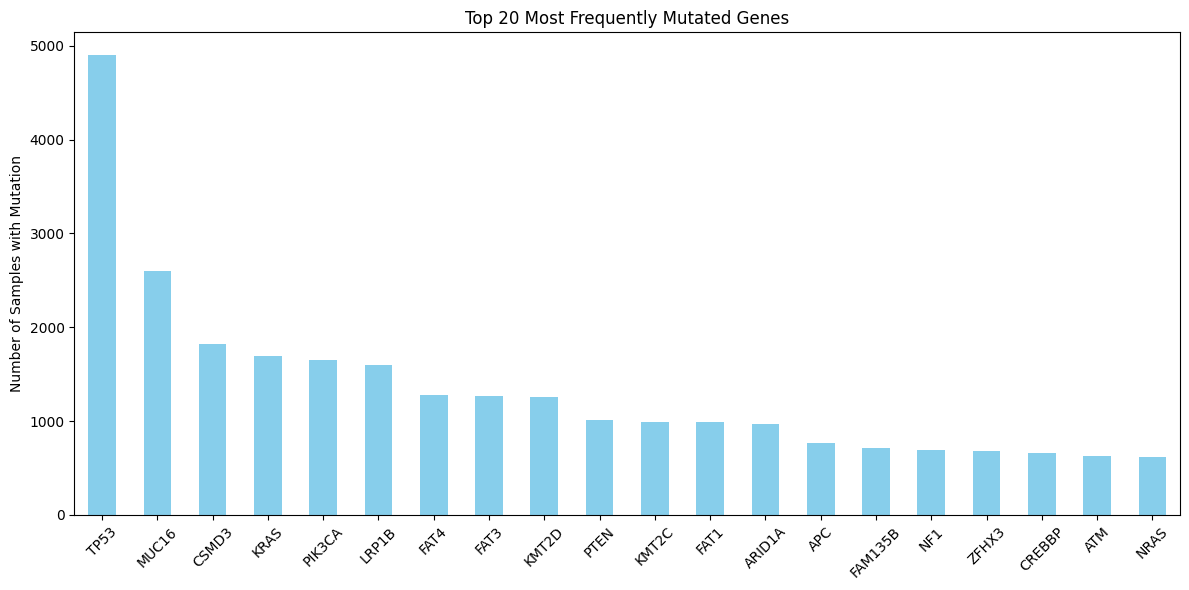

In [5]:
# Sum mutations per gene
gene_mut_counts = combined_binary.drop(columns=["Primary_Site"]).sum().sort_values(ascending=False)

# Plot Top 20
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
gene_mut_counts.head(20).plot(kind='bar', color='skyblue')
plt.title("Top 20 Most Frequently Mutated Genes")
plt.ylabel("Number of Samples with Mutation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


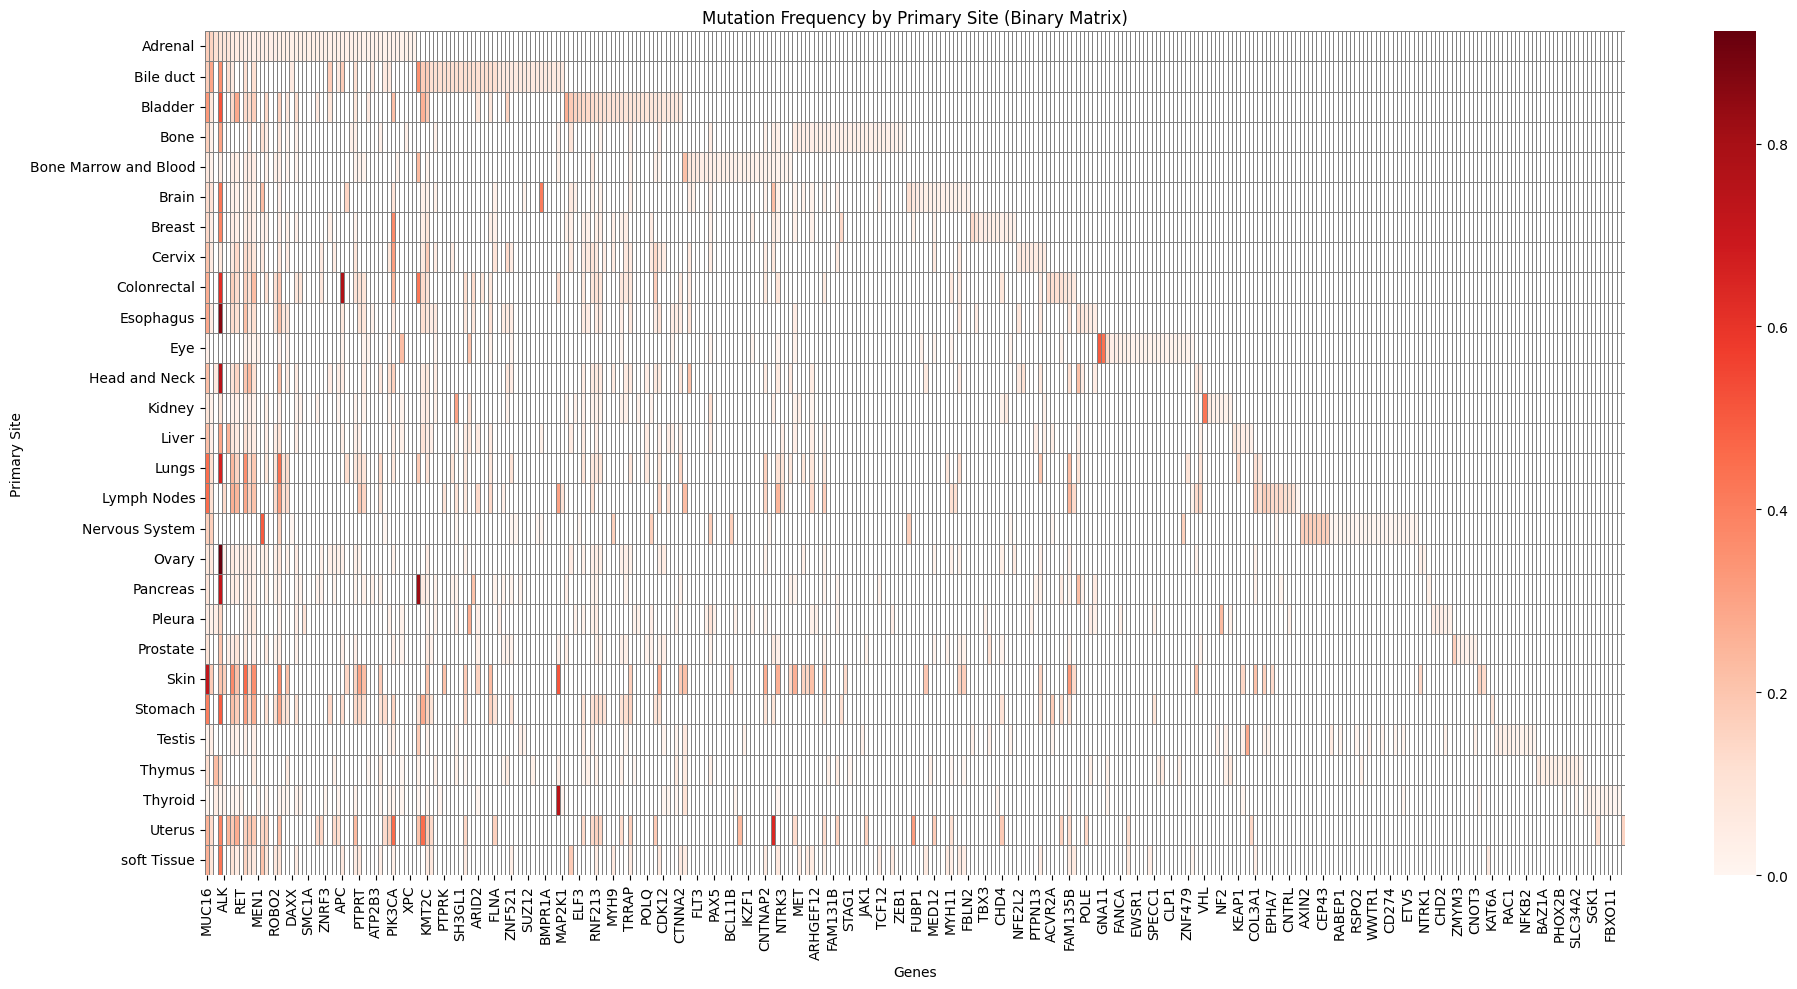

In [6]:
import seaborn as sns

# Group by site
heatmap_data = combined_binary.groupby("Primary_Site").mean()

# Plot heatmap
plt.figure(figsize=(20,10))
sns.heatmap(heatmap_data, cmap="Reds", linewidths=0.5, linecolor='gray')
plt.title("Mutation Frequency by Primary Site (Binary Matrix)")
plt.xlabel("Genes")
plt.ylabel("Primary Site")
plt.tight_layout()
plt.show()


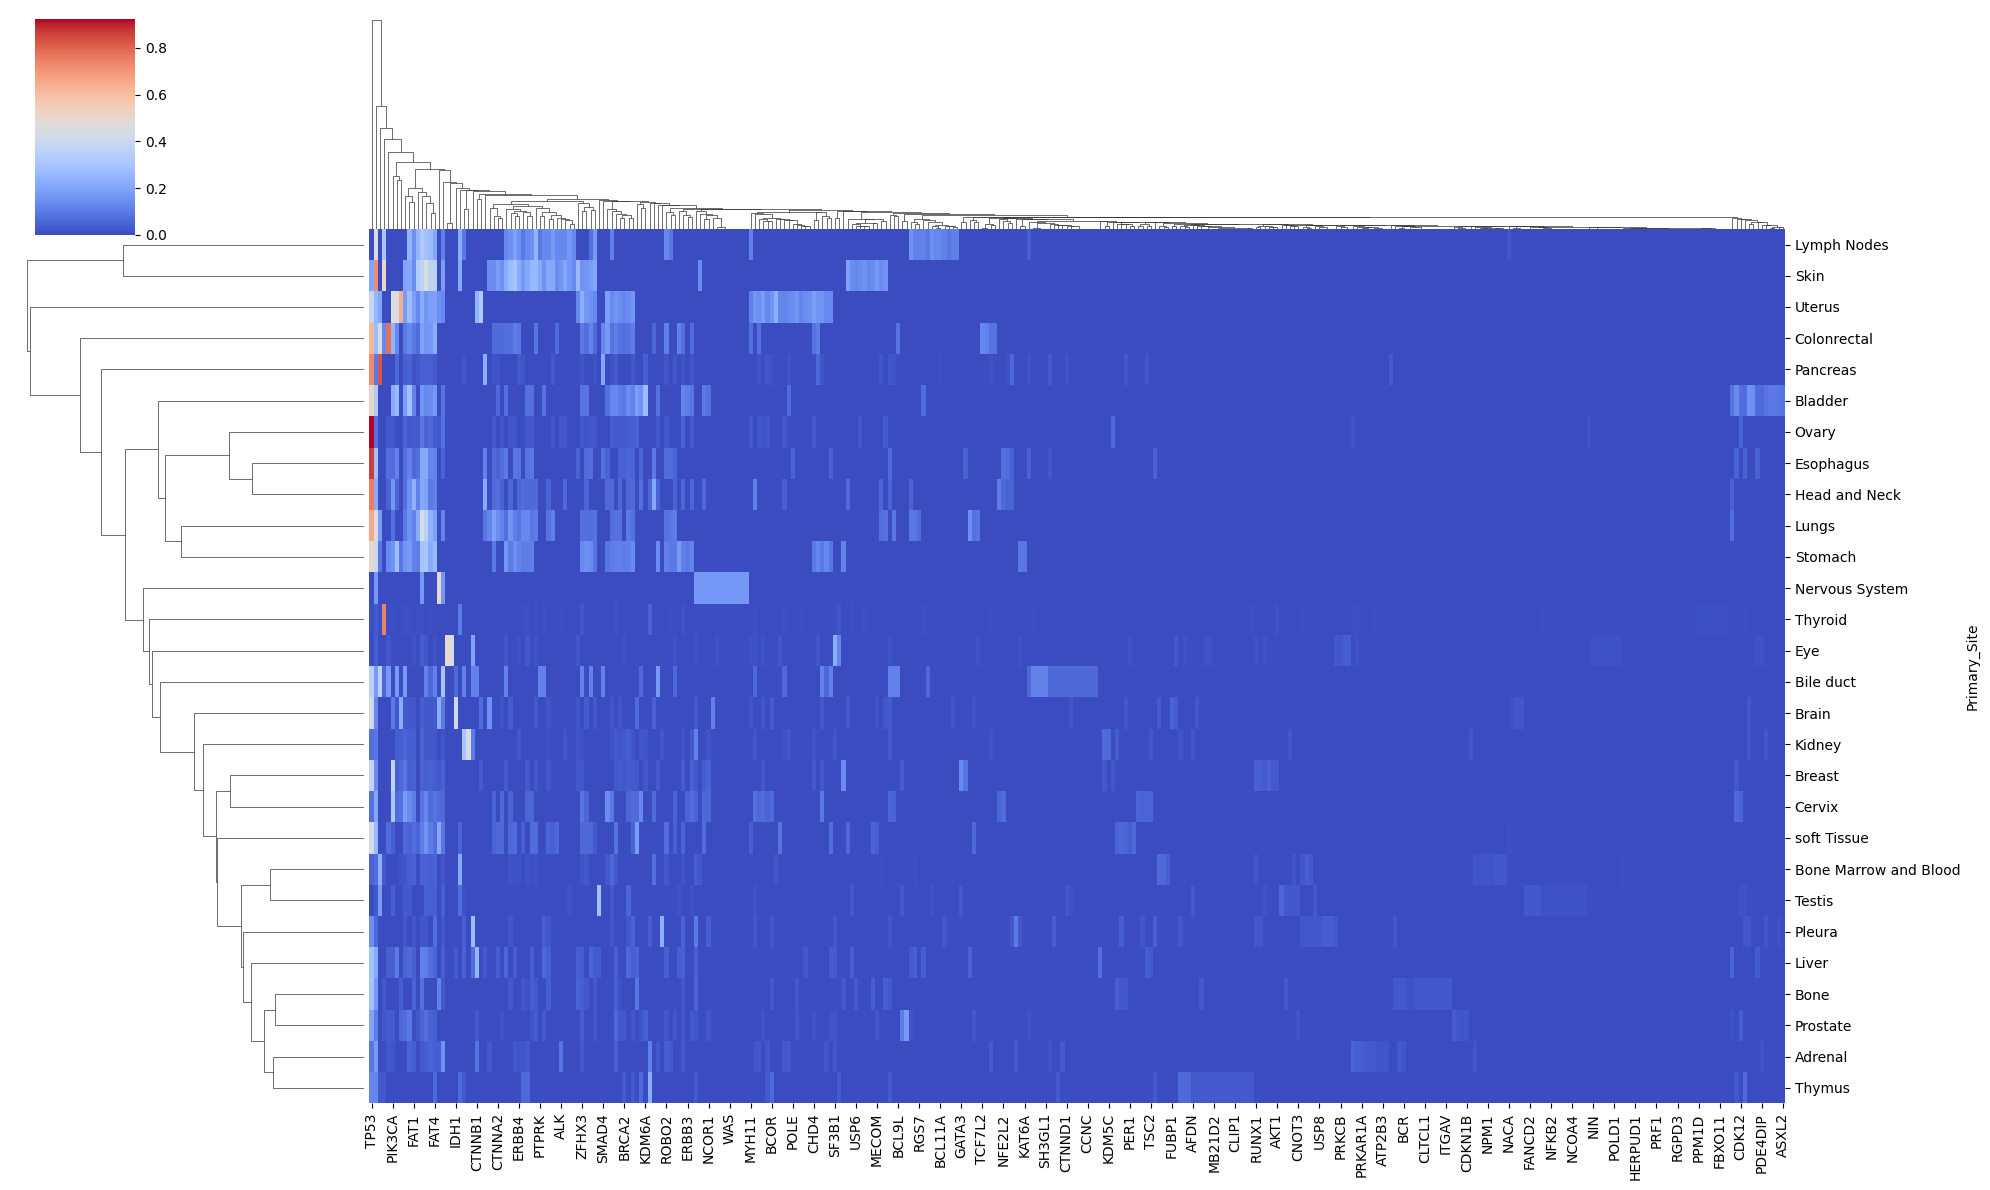

In [7]:
import numpy as np
heatmap_data_filled = heatmap_data.replace([np.inf, -np.inf], np.nan).fillna(0)
sns.clustermap(heatmap_data_filled, cmap="coolwarm", figsize=(20,12), col_cluster=True, row_cluster=True)



In [8]:
# Each sample becomes a row with gene 0/1 values + its primary site
ml_df = combined_binary.copy()

# Optional: encode primary site
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ml_df["Primary_Site_Label"] = le.fit_transform(ml_df["Primary_Site"])

# Save
ml_df.to_csv("Oncomatrix_for_ML.csv", index=False)
print("✅ Machine Learning dataset ready!")


✅ Machine Learning dataset ready!


In [9]:
from sklearn.model_selection import train_test_split

X = ml_df.drop(columns=["Primary_Site", "Primary_Site_Label"])
y = ml_df["Primary_Site_Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("🎯 Random Forest Results:\n")
print(classification_report(y_test, rf_preds, target_names=le.classes_))
accuracy = accuracy_score(y_test, rf_preds)
print(f"Accuracy: {accuracy * 100:.2f}%")
report = classification_report(y_test, rf_preds, target_names=le.classes_)
# Save report to a text file
with open("random_forest_report.txt", "w") as f:
    f.write("🎯 Random Forest Classification Report\n\n")
    f.write(report)
    f.write(f"\n\nAccuracy: {accuracy * 100:.2f}%")

print("✅ Classification report saved to 'random_forest_report.txt'")


🎯 Random Forest Results:

                       precision    recall  f1-score   support

              Adrenal       1.00      1.00      1.00        46
            Bile duct       1.00      1.00      1.00         5
              Bladder       1.00      1.00      1.00       122
                 Bone       1.00      1.00      1.00        23
Bone Marrow and Blood       1.00      1.00      1.00       729
                Brain       1.00      1.00      1.00       318
               Breast       1.00      1.00      1.00       355
               Cervix       1.00      1.00      1.00       100
          Colonrectal       1.00      1.00      1.00       235
            Esophagus       1.00      1.00      1.00        69
                  Eye       1.00      1.00      1.00        24
        Head and Neck       1.00      1.00      1.00       182
               Kidney       1.00      1.00      1.00       240
                Liver       1.00      1.00      1.00       112
                Lungs       

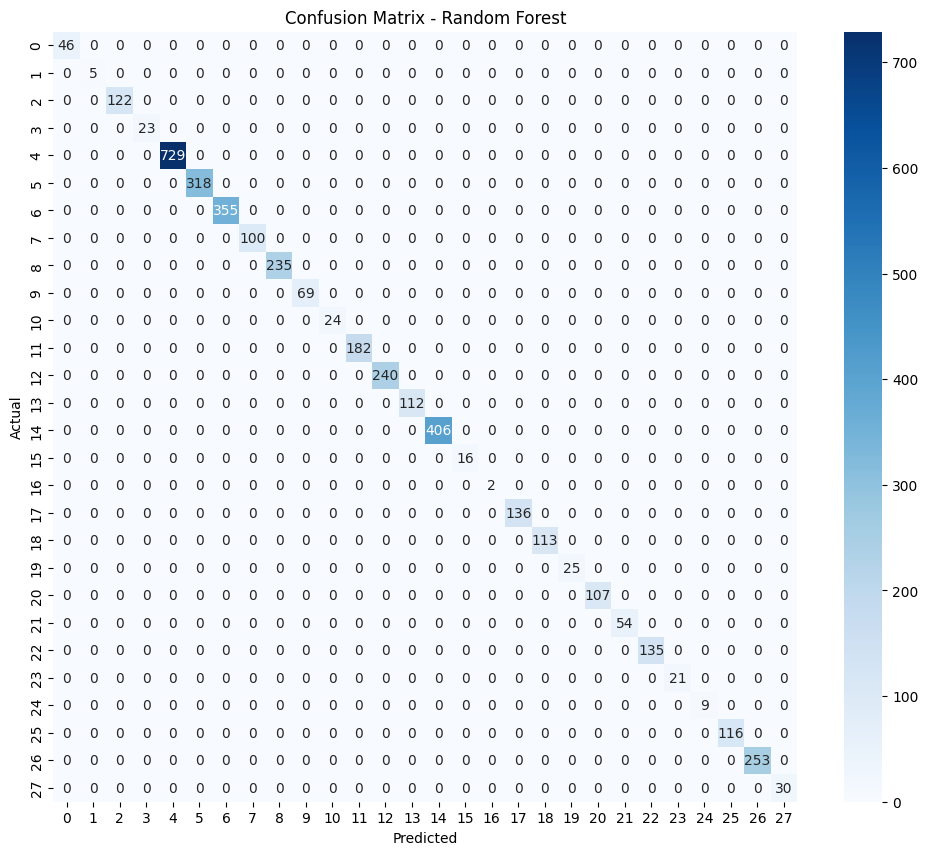

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data with your trained Random Forest model
y_pred = rf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample data loading
df = pd.read_csv('your_dataset.csv')

# Print columns to check if 'Primary_Site' exists
print("Columns in the dataset:", df.columns)

# Check if 'Primary_Site' exists in the DataFrame
if "Primary_Site" in df.columns:
    le = LabelEncoder()
    df["Primary_Site_Label"] = le.fit_transform(df["Primary_Site"])
else:
    print("Error: 'Primary_Site' column not found in the dataset.")


Index(['PTEN', 'PIK3CA', 'ARID1A', 'TP53', 'PIK3R1', 'KMT2D', 'MUC16',
       'CTNNB1', 'ZFHX3', 'CTCF', 'CSMD3', 'KRAS', 'FAT4', 'FAT3', 'FAT1',
       'CHD4', 'FBXW7', 'MED12', 'KMT2C', 'LRP1B', 'NSD1', 'TRRAP', 'FLNA',
       'RNF213', 'JAK1', 'RNF43', 'ATM', 'BCOR', 'PPP2R1A', 'NBEA', 'ATRX',
       'BCORL1', 'AKAP9', 'POLE', 'FGFR2', 'BIRC6', 'NCOR2', 'CREBBP', 'NF1',
       'FAM135B', 'RANBP2', 'RPL22', 'BRCA2', 'MUC4', 'IRS4', 'ANK1',
       'CACNA1D', 'DICER1', 'CUX1', 'MYH11', 'Primary_Site'],
      dtype='object')


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import joblib

# Step 1: Load your dataset
ml_df = pd.read_csv("Oncomatrix_for_ML.csv")

# Step 2: Encode primary site labels
le = LabelEncoder()
ml_df["Primary_Site_Label"] = le.fit_transform(ml_df["Primary_Site"])

# Step 3: Split features and labels
X = ml_df.drop(columns=["Primary_Site", "Primary_Site_Label"])
y = ml_df["Primary_Site_Label"]

# Step 4: Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Step 5: Save the trained model, label encoder, and feature names
joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(X.columns.tolist(), 'feature_columns.pkl')

print("✅ All model components saved successfully!")


✅ All model components saved successfully!


In [13]:
import pandas as pd

# Load your binary mutation matrix
combined_binary = pd.read_csv("Combined_Oncomatrix_Binary_with Site.csv")

# Confirm load
print("✅ Loaded combined_binary with shape:", combined_binary.shape)
combined_binary.head()


✅ Loaded combined_binary with shape: (13275, 338)


,Case,MUC16,NF1,HRAS,TP53,ALK,CTNNB1,FAT3,KMT2D,RET,...,PPM1D,CHEK2,SGK1,DICER1,ABL2,KAT6B,FBXO11,BCL2L12,HSP90AA1,PPP2R1A
0,TARGET-30-PATEPF,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TCGA-PK-A5HB,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TCGA-OR-A5JB,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TCGA-QR-A6GW,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TCGA-PK-A5HC,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
import pandas as pd

# Step 1: Load the mutation matrix
df = pd.read_csv("Combined_Oncomatrix_Binary_with Site.csv", sep="\t")  # or sep="," if it's a CSV

# Step 2: Clean column names
df.columns = df.columns.str.strip()

# Step 3: Identify non-gene columns
non_gene_cols = [col for col in df.columns if df[col].dtype == 'object']

# You may want to confirm this:
print("Non-gene columns:", non_gene_cols)

# Step 4: Isolate gene mutation data
mutation_data = df.drop(columns=non_gene_cols)

# Step 5: Fill missing values with 0, convert to int
mutation_data = mutation_data.fillna(0).astype(int)

# Step 6: Compute TMB
df["TMB"] = mutation_data.sum(axis=1)

# Step 7: Save
df.to_csv("mutation_data_with_TMB.csv", index=False)
print("✅ File saved with TMB column.")


Non-gene columns: ['Case,MUC16,NF1,HRAS,TP53,ALK,CTNNB1,FAT3,KMT2D,RET,LRP1B,FAT1,FAT4,MEN1,ATRX,ATM,PRKAR1A,ROBO2,CSMD3,SETBP1,PTPRD,DAXX,KMT2A,TNC,LATS2,SMC1A,EPAS1,RANBP2,BCORL1,ZNRF3,UBR5,IRS4,CUX1,APC,EGFR,VAV1,ZFHX3,PTPRT,ERBB4,PDE4DIP,GNAS,ATP2B3,CTNND2,RPL22,NSD1,PIK3CA,WT1,SF3B1,BCR,XPC,PML,Primary_Site,KRAS,ARID1A,KMT2C,NCOR2,SMARCA4,TRIP11,PTPRK,ITK,STK11,PBRM1,SH3GL1,NBEA,BAP1,SMAD4,ARID2,BCL9L,MSN,PREX2,FLNA,SETDB1,NRG1,EP300,ZNF521,BRD4,CTNND1,MSH6,SUZ12,EML4,CCNC,IDH1,BMPR1A,MAFB,S100A7,BRAF,MAP2K1,KDM6A,RB1,STAG2,ELF3,BIRC6,ERBB2,CREBBP,RNF213,AKAP9,ERBB3,CDKN1A,MYH9,ERCC2,BRCA2,SPEN,TRRAP,FGFR3,TSC1,ASXL2,POLQ,NCOR1,FBXW7,DCC,CDK12,ATR,ARID1B,ASXL1,CTNNA2,NRAS,NOTCH1,PTPN11,FLT3,NSD2,TENT5C,SETD2,PAX5,ETV6,PHF6,JAK2,BCL11B,DNMT3A,CTCF,DDX3X,IKZF1,RUNX1,NPM1,TET2,CNTNAP2,MYC,PTEN,GRIN2A,NTRK3,BCL7A,RUNX1T1,MUC4,MET,KDR,COL1A1,PTPRB,ARHGEF12,ITGAV,ANK1,MAP3K13,FAM131B,BCOR,CDH1,USP6,STAG1,IL6ST,EIF3E,SALL4,JAK1,MPL,CLTCL1,FLT4,TCF12,ERC1,KIAA1549,MYCN,ZEB1,EIF4A2,CIC,PIK

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV
df = pd.read_csv("Combined_Oncomatrix_Binary_with Site.csv")  # Update with actual filename
df.columns = df.columns.str.strip()  # Remove any extra spaces

# Confirm presence of required columns
assert "Primary_Site" in df.columns, "Missing 'Primary_Site' column"
assert "Case" in df.columns, "Missing 'Case' column"

# Drop Case column to isolate gene data
mutation_data = df.drop(columns=["Case", "Primary_Site"])

# Fill NaNs with 0 and convert to integers
mutation_data = mutation_data.fillna(0).astype(int)

# Add Tumor Mutation Burden (TMB) as new column
df["TMB"] = mutation_data.sum(axis=1)


C:\Users\shrav\AppData\Local\Temp\ipykernel_21944\807907580.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
C:\Users\shrav\AppData\Local\Temp\ipykernel_21944\807907580.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)


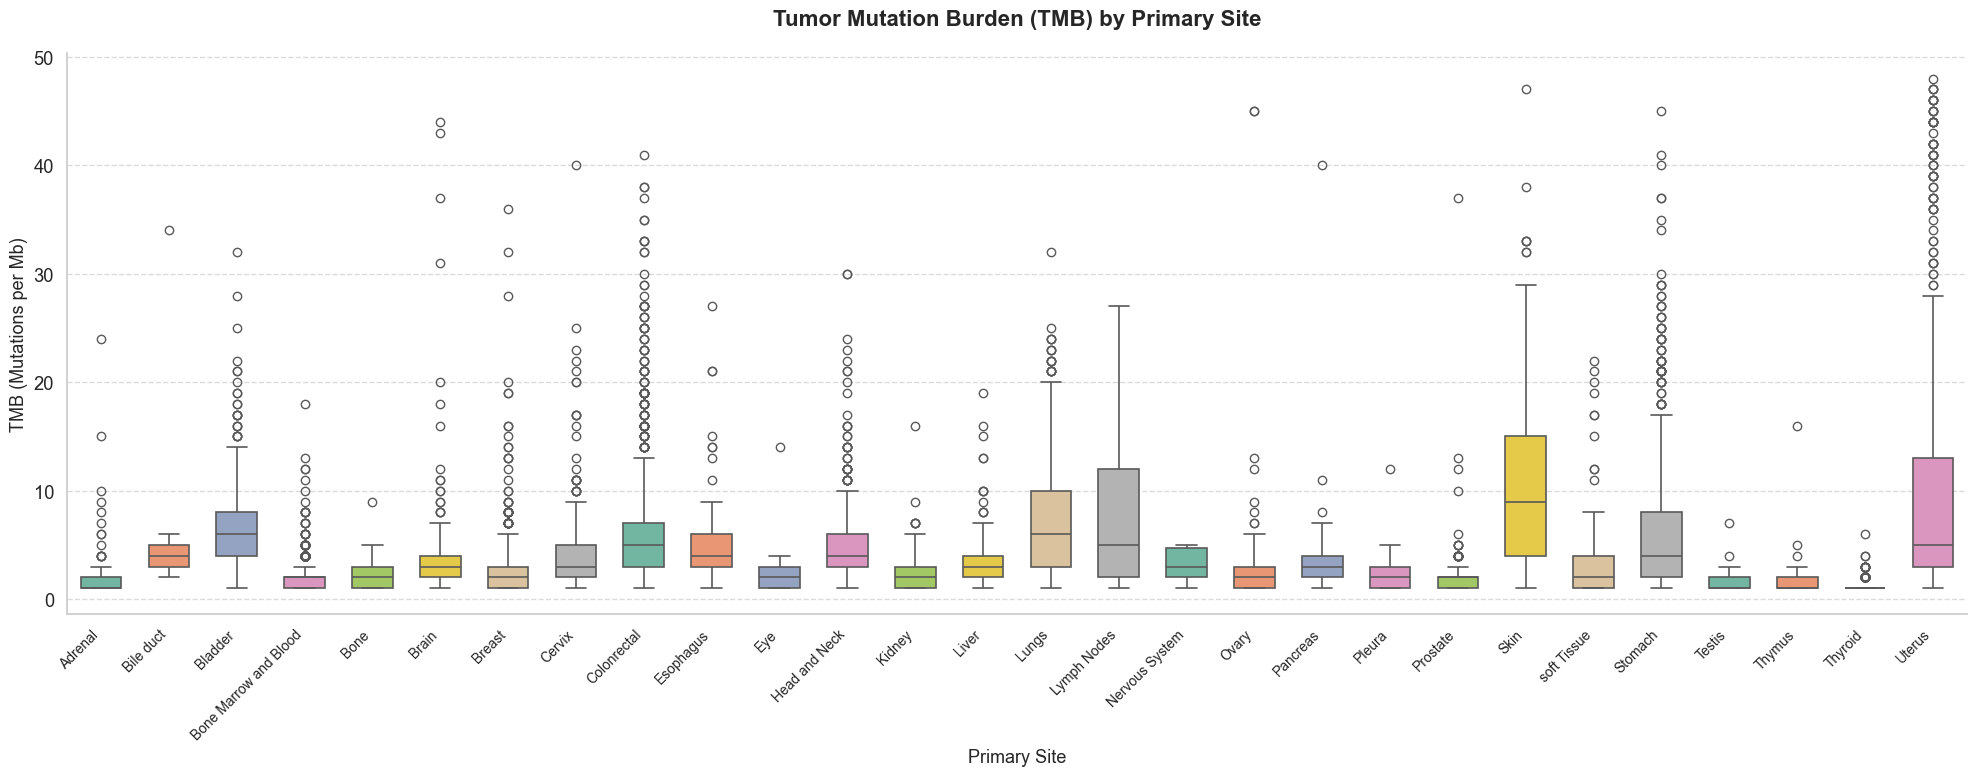

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set style
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Set figure size
plt.figure(figsize=(20, 8))

# Create the boxplot
ax = sns.boxplot(
    data=df,
    x="Primary_Site",
    y="TMB",
    showfliers=True,          # Show outliers
    linewidth=1.2,
    width=0.6,
    palette="Set2"            # Use a better color palette
)

# Improve x-axis
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
ax.set_title("Tumor Mutation Burden (TMB) by Primary Site", fontsize=16, weight='bold', pad=20)
ax.set_xlabel("Primary Site", fontsize=13)
ax.set_ylabel("TMB (Mutations per Mb)", fontsize=13)

# Grid styling
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines for a cleaner look
sns.despine()

# Add tight layout
plt.tight_layout()
plt.show()



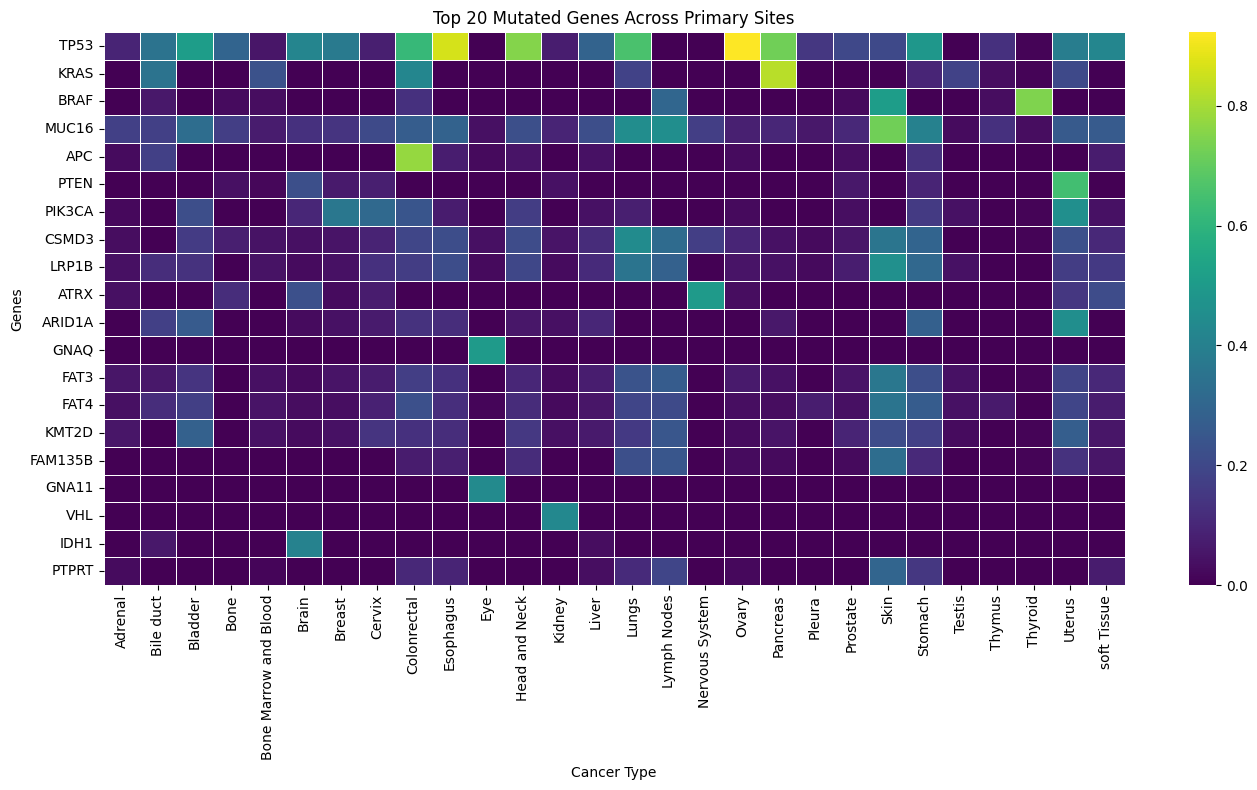

In [33]:
# Calculate frequency of mutations per gene per cancer type
mutation_data["Primary_Site"] = df["Primary_Site"]
grouped = mutation_data.groupby("Primary_Site").mean().T

# Select top 20 most variable genes
top_genes = grouped.var(axis=1).sort_values(ascending=False).head(20).index

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(grouped.loc[top_genes], cmap="viridis", linewidths=0.5)
plt.title("Top 20 Mutated Genes Across Primary Sites")
plt.ylabel("Genes")
plt.xlabel("Cancer Type")
plt.tight_layout()
plt.show()
